In [1]:
import argparse
import pandas

# declare some column names
travelTime = 'travelTime'
startTime = 'startTime'
endTime = 'endTime'
id = 'personId'
tripNumber = 'tripNo'
mode = 'mainMode'
distance = 'distance'

def parse_args(args):
    parser = argparse.ArgumentParser()
    parser.add_argument('-f', '--files', nargs='+', required=True)
    parser.add_argument('-n', '--names', nargs='+', required=True)
    return parser.parse_args(args)

def read_csv(listOfFiles, listOfNames):
    
    assert(len(listOfFiles) == len(listOfNames)), 'number of files and scenario names should be equal but was: (' + str(len(listOfFiles)) + '/' + str(len(listOfNames)) + ')'
    
    result = []

    for file, name in zip(listOfFiles, listOfNames):
        scenario = pandas.read_csv(file, usecols=[id, tripNumber, distance, startTime, endTime, mode])
        scenario.set_index([id, tripNumber], inplace=True)
        scenario.sort_index(inplace=True)
        result.append(scenario)
    return result

In [15]:
dataPath = "C:\\Users\\Janekdererste\\Desktop\\nemo_analysis\\"
args = parse_args([
    '-f', dataPath + 'base-case.csv', dataPath + 'healthy.csv', dataPath + 'deurb-no-drt.csv', dataPath + 'deurb-low-fare.csv', dataPath + 'smart.csv',
    '-n', 'Basisfall', 'Gesund & Nachhaltig', 'Deurb !Drt', 'Deurb', 'Smart'
])

dataFrames = read_csv(args.files, args.names)
data = pandas.concat(dataFrames, keys=args.names, names=['RunId', id, tripNumber])
data[travelTime] = data[endTime] - data[startTime]
#filter unplausible walk trips

,,,startTime,endTime,distance,mainMode,travelTime,speed
RunId,personId,tripNo,,,,,,


In [25]:
#filter unplausible walk trips
data['speed'] = data[distance] / data[travelTime]
filtered = data.loc[(data[mode] != 'walk') | ((1 < data['speed']) & (data['speed'] < 2)) ]
filtered


startTime  endTime      distance mainMode  \
RunId     personId   tripNo                                              
Basisfall 54804601   0         24903.0  27398.0  13001.306360      car   
                     1         32565.0  34230.0   4781.294600      car   
                     2         34230.0  35390.0   2302.954800      car   
                     3         41131.0  42675.0   4047.200370      car   
                     4         42675.0  43419.0   1608.864389      car   
...                                ...      ...           ...      ...   
Smart     1444331801 3         44292.0  45116.0   2197.098074      car   
          1444365301 0         51061.0  53621.0   7911.298393       pt   
                     1         54408.0  56480.0   7911.298393       pt   
                     2         60992.0  62786.0  11442.570637      car   
                     3         62786.0  64303.0  11442.570637      car   

                             travelTime     speed  
RunId     personId   tripNo                        
Basisfall 54804601   0           2495.0  5.210944  
                     1           1665.0  2.871648  
                     2           1160.0  1.985306  
                     3           1544.0  2.621244  
                     4            744.0  2.162452  
...                                 ...       ...  
Smart     1444331801 3            824.0  2.666381  
          1444365301 0           2560.0  3.090351  
                     1           2072.0  3.818194  
                     2           1794.0  6.378245  
                     3           1517.0  7.542894  

[612640 rows x 6 columns]

In [26]:
walk_trips = filtered[(data.mainMode == 'walk')]
walk_trips.sort_values(by=[travelTime], inplace=True, ascending=False)
walk_trips.head(50)

c:\users\janekdererste\projects\matsim-analysis-python\venv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
c:\users\janekdererste\projects\matsim-analysis-python\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


startTime   endTime      distance  \
RunId               personId   tripNo                                      
Deurb               687437201  5         58765.0  125706.0  84193.676937   
                    701348601  1         48080.0  107708.0  73523.426147   
Deurb !Drt          701348601  1         66006.0  125634.0  73523.426147   
Deurb               601640901  1         48909.0  105954.0  71929.172763   
                    710605501  0         12183.0   60781.0  61461.275404   
Gesund & Nachhaltig 583530101  1         70872.0  119230.0  61149.227292   
                               0         22514.0   70872.0  61149.227292   
Deurb               1157792301 1         17388.0   64198.0  59249.948573   
                    576467401  1         51866.0   97970.0  58428.766840   
                    991060401  2         20302.0   64010.0  55273.333135   
                    992817801  1         62873.0  106119.0  85414.176062   
Deurb !Drt          1017651101 5         78738.0  118607.0  42645.339658   
                    132121101  6         72635.0  112058.0  49855.986047   
Gesund & Nachhaltig 132121101  6         81937.0  121360.0  49741.279726   
Basisfall           132121101  6         77880.0  117303.0  49855.986047   
Deurb               380704501  4         82549.0  121567.0  43548.449816   
                    1157792301 4         80632.0  119496.0  65545.706367   
Gesund & Nachhaltig 875142801  0          1399.0   40119.0  49009.260671   
                               1         46005.0   84725.0  49009.260671   
Deurb               1245262901 3         80642.0  118778.0  48527.762390   
Gesund & Nachhaltig 1245262901 3         83575.0  121711.0  48450.453674   
                    1245354501 0         40567.0   78296.0  47664.232537   
Deurb !Drt          384013001  1         85591.0  122510.0  38898.744771   
Smart               1123925101 4         86520.0  123383.0  46992.149877   
Deurb               1123925101 4         86520.0  123383.0  46992.149877   
Deurb !Drt          1123925101 4         86520.0  123383.0  46992.149877   
Gesund & Nachhaltig 1123925101 4         86520.0  123383.0  46665.413881   
Basisfall           1123925101 4         86520.0  123383.0  46992.149877   
                    584906301  2          7782.0   44526.0  46592.556461   
Gesund & Nachhaltig 584906301  2          4861.0   41605.0  46218.983184   
Deurb !Drt          584906301  2          7782.0   44525.0  46592.556461   
Deurb               600006101  3         90495.0  127003.0  46201.657751   
Deurb !Drt          382531101  7         68647.0  104877.0  38378.957535   
Gesund & Nachhaltig 1267712001 4         70948.0  107105.0  45104.445208   
                    1249472401 0         18240.0   53995.0  45223.043684   
Deurb !Drt          1017651101 0         35056.0   70041.0  49787.307872   
Smart               996220701  5         79370.0  114292.0  44050.714161   
Deurb               996220701  5         79370.0  114292.0  44050.714161   
Deurb !Drt          996220701  5         76864.0  111786.0  44050.714161   
Basisfall           996220701  5         79370.0  114292.0  44050.714161   
Deurb               131538001  4         70698.0  105482.0  43906.074932   
Gesund & Nachhaltig 875303901  7         87228.0  121834.0  44076.998090   
Basisfall           875303901  7         80129.0  114735.0  44062.046803   
Smart               875303901  7         85169.0  119775.0  44062.046803   
Gesund & Nachhaltig 1266794101 1         57405.0   91822.0  43209.674794   
                               0         11323.0   45740.0  43209.674794   
Deurb !Drt          718141601  4         82045.0  116336.0  38357.394600   
Gesund & Nachhaltig 1176360701 1         22276.0   56462.0  43696.747037   
                    836207901  3         78231.0  112220.0  43325.233389   
Smart               445970401  6         81420.0  115375.0  43399.286901   

                                      mainMode  travelTime     speed  
RunId          

In [27]:
# select the mode and the distance
travelled_distances = filtered[[distance, mode]]
travelled_distances

distance mainMode
RunId     personId   tripNo                       
Basisfall 54804601   0       13001.306360      car
                     1        4781.294600      car
                     2        2302.954800      car
                     3        4047.200370      car
                     4        1608.864389      car
...                                   ...      ...
Smart     1444331801 3        2197.098074      car
          1444365301 0        7911.298393       pt
                     1        7911.298393       pt
                     2       11442.570637      car
                     3       11442.570637      car

[612640 rows x 2 columns]

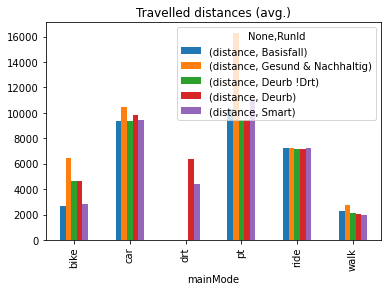

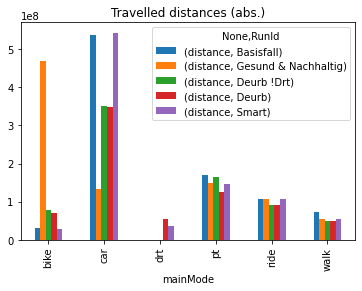

In [28]:
# group by mode and by run id
average = travelled_distances.groupby([mode, 'RunId']).mean()
# unstack the multi-index into two columns for both run ids and then plot
average.unstack(level='RunId').plot.bar(title='Travelled distances (avg.)')

absolute = travelled_distances.groupby([mode, 'RunId']).sum()

absolute.unstack(level='RunId').plot.bar(title='Travelled distances (abs.)')

In [29]:
distance_sum = travelled_distances.unstack(level='RunId')[distance].sum()

distance_sum


RunId
Basisfall              9.179794e+08
Gesund & Nachhaltig    9.131599e+08
Deurb !Drt             7.335854e+08
Deurb                  7.402556e+08
Smart                  9.179917e+08
dtype: float64

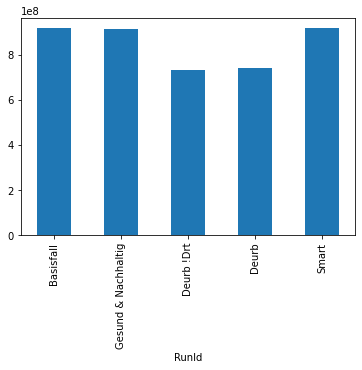

In [30]:
distance_sum.plot.bar()